In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
from thesis_toolbox.utils import get_locations_CLP,read_depostion_datasets
from thesis_toolbox.plot.tools import add_letter
from thesis_toolbox.plot.plot_source_contribution import depositon_facet_plot
from DUST.plot.plotting import mpl_base_map_plot_xr
from DUST.plot.maps import map_terrain_china, map_china
from DUST.plot.utils import _gen_flexpart_colormap,_add_colorbar
from matplotlib.colors import LogNorm
from thesis_toolbox.plot.tools import latex_plot
from matplotlib import rc
import matplotlib.cm as cm
import matplotlib
# latex_plot()

In [2]:
if 'snakemake' in globals():
    to_file = True
    path='./'
else:
    path = '../../../'
    to_file= False

In [3]:
locs = ['SHAPOTOU','BADOE','SACOL','LUOCHUAN','LANTIAN','LINGTAI']
drydep_2micron = read_depostion_datasets(path+'results/model_results/', locs, 'drydep','2micron')
drydep_2micron = drydep_2micron.mean(dim='year')

locs = ['SHAPOTOU','BADOE','SACOL','LUOCHUAN','LANTIAN','LINGTAI']
wetdep_2micron = read_depostion_datasets(path+'results/model_results/', locs, 'wetdep','2micron')
wetdep_2micron = wetdep_2micron.mean(dim='year')


In [4]:
drydep_wetdep_combo_2micron = drydep_2micron.merge(wetdep_2micron)

In [5]:
drydep_wetdep_combo_2micron.attrs['locations'] = drydep_2micron.locations+wetdep_2micron.locations

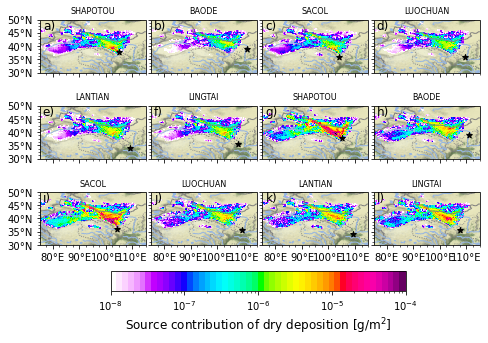

In [13]:
fig,ax = plt.subplots(nrows=3, ncols=4,  figsize=(8.3*0.95, 11.7*0.4), subplot_kw={'projection':ccrs.PlateCarree()}, sharey=True, sharex=True)
depositon_facet_plot(drydep_wetdep_combo_2micron, vmin=1e-8,vmax=1e-4, 
                    add_labels=False, ax=ax
                    , hspace=0.05, wspace=0.05,  
                    fontsize_title=8, colorbar=False)
fig = plt.gcf()
cmap = _gen_flexpart_colormap()
cax = fig.add_axes([0.25, 0.03,0.52,0.06])
fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.LogNorm(1e-8,1e-4), cmap=cmap), cax=cax,
            label='Source contribution [$\mathrm{g/m}^2$]', orientation='horizontal')
add_letter(ax,y=0.82, fontsize=12)
if to_file:
    plt.savefig(snakemake.output.clay_plot,bbox_inches='tight')
